# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [342]:
#Stanislav 9015
#Illia 4429

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [429]:
#in this part we are displaying columns from the data sets to confirm we loaded them correctly (using head from pandas)
#we show basic stats using info from pandas 
#we checking missing values as well 
#also get summary stats using the describe from Pandas.
# we choose boxplot and histograms to show visualization of the data
#we can see in the histogram for example the wine has about 13% alcohol and it doesn't change much but remain in 11-14 %

In [431]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline

In [433]:
train_df = pd.read_csv('wine_train.csv')
test_df = pd.read_csv('wine_test.csv')

In [435]:
# Display the first few rows of the training set
print("Training Set:")
print(train_df.head())

# Display the first few rows of the test set
print("\nTest Set:")
print(test_df.head())

# Check basic information of the datasets 
print("\nTrain Set Info:")
train_df.info()

print("\nTest Set Info:")
test_df.info()

# Check for missing values
print("\nMissing Values in Train Set:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Set:")
print(test_df.isnull().sum())

Training Set:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_wines  proline  target

In [437]:

print("\nSummary statistics for the first 4 columns in the train set:")
train_df.describe().iloc[:, :4]



Summary statistics for the first 4 columns in the train set:


,alcohol,malic_acid,ash,alcalinity_of_ash
count,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718
std,0.789931,1.093317,0.283231,3.354815
min,11.410000,0.740000,1.360000,10.600000
25%,12.370000,1.592500,2.222500,17.250000
50%,13.050000,1.865000,2.360000,19.250000
75%,13.637500,3.020000,2.557500,21.375000
max,14.750000,5.650000,3.230000,30.000000


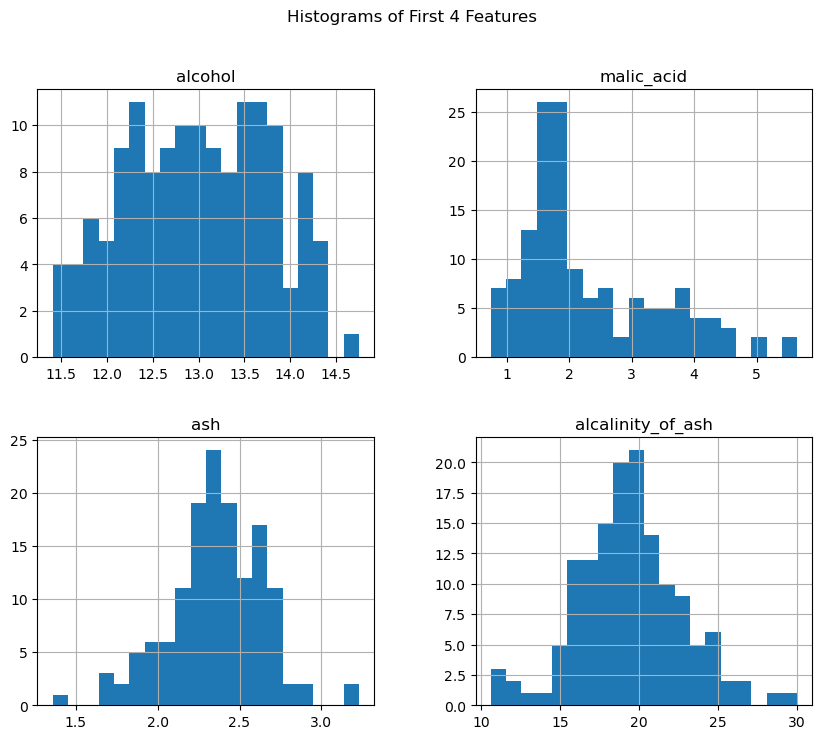

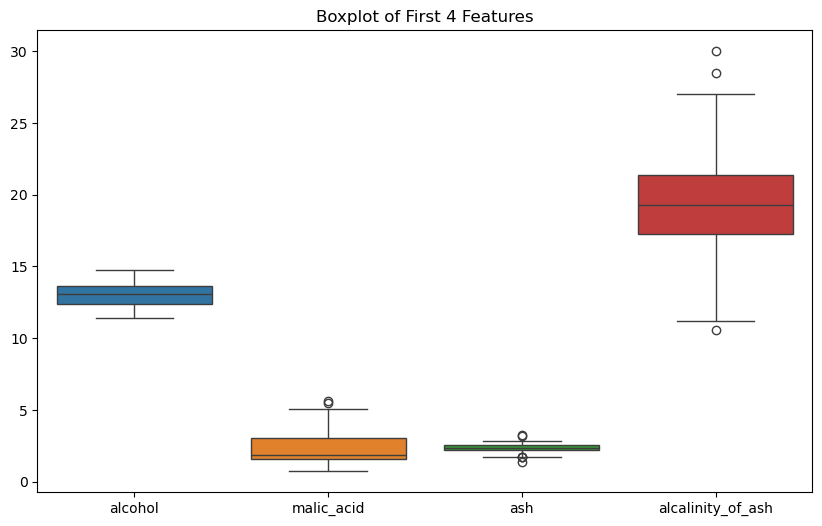

In [439]:
# Visualization 1: Histogram 
train_df.iloc[:, :4].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of First 4 Features")
plt.show()

# Visualization 2: Boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df.iloc[:, :4])
plt.title("Boxplot of First 4 Features")
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [407]:
#preparing the train data by seperating features 
#using a Random forset calssification and KNN
# We defined a grid of hyperparameters for both models and used GridSearchCV to find the best combination of these parameters
# After training, we printed out the best hyperparameters and evaluated the models' performance using metrics (f1 for classification)


In [441]:
X_train = train_df.iloc[:, :-1]  
y_train = train_df.iloc[:, -1]

In [443]:
#Define a range of k values and the feature selection step
k_values = [8, 10, 12]
feature_selection_step = ('feature_selection', SelectKBest(score_func=f_classif))  

# Define scorer for classification
classification_scorer = make_scorer(f1_score, average='macro') #(as assingment requested)

#Param grid for RandomForestClassifier 
param_grid_RandomForestClassifier = {
    'feature_selection__k': k_values,  
    'classifier__n_estimators': [50, 200],      
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'classifier__max_features': ['sqrt'],  # Number of features to consider when looking for the best split
}

#Param grid for KNeighborsClassifier (KNN)
param_grid_knn = {
    'feature_selection__k': k_values,  # Reuse feature selection values
    'classifier__n_neighbors': [3, 5, 7],  # Number of neighbors for KNN
    'classifier__weights': ['uniform', 'distance'],  # How to weight the neighbors
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree']  # Algorithm to compute neighbors
}

# classification 1 pipeline
pipeline_RandomForestClassifier = Pipeline([
    feature_selection_step,  
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# classification 2 pipeline
pipeline_knn = Pipeline([
    feature_selection_step,  # Feature selection step
    ('scaler', StandardScaler()),  # Scaling the features
    ('classifier', KNeighborsClassifier())  # KNN classifier
])


In [445]:
# Grid Search with 5-fold cross-validation for randomForest
grid_search_RandomForestClassifier = GridSearchCV(estimator=pipeline_RandomForestClassifier, param_grid=param_grid_RandomForestClassifier, scoring=classification_scorer, cv=5, verbose=1, n_jobs=-1)
grid_search_RandomForestClassifier.fit(X_train, y_train)

# Perform Grid Search with 5-fold cross-validation for KNN
grid_search_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=classification_scorer, cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selection', SelectKBest()),
                                       ('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree'],
                         'classifier__n_neighbors': [3, 5, 7],
                         'classifier__weights': ['uniform', 'distance'],
                         'feature_selection__k': [8, 10, 12]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro),
             verbose=1)

In [446]:
# Print results for RandomForestClassifier
print(f"Best Hyperparameters for RandomForestClassifier: {grid_search_RandomForestClassifier.best_params_}")
print(f"Best F1 Score: {grid_search_RandomForestClassifier.best_score_:.4f}")

# Print results for KNN
print(f"Best Hyperparameters for KNN: {grid_search_knn.best_params_}")
print(f"Best F1 Score for KNN: {grid_search_knn.best_score_:.4f}")

# Show only the first 5 rows of results for RandomForestClassifier and KNN (summary)
results_rf = pd.DataFrame(grid_search_RandomForestClassifier.cv_results_)  # RandomForest results
results_knn = pd.DataFrame(grid_search_knn.cv_results_)  # KNN results

# Display top 5 cross-validation results for RandomForestClassifier
print("\nTop 5 Cross-Validation Results for RandomForestClassifier:")
print(results_rf[['mean_test_score', 'std_test_score', 'params']].head(5))

# Display top 5 cross-validation results for KNN
print("\nTop 5 Cross-Validation Results for KNeighborsClassifier:")
print(results_knn[['mean_test_score', 'std_test_score', 'params']].head(5))

Best Hyperparameters for RandomForestClassifier: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50, 'feature_selection__k': 8}
Best F1 Score: 0.9863
Best Hyperparameters for KNN: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform', 'feature_selection__k': 8}
Best F1 Score for KNN: 0.9526

Top 5 Cross-Validation Results for RandomForestClassifier:
   mean_test_score  std_test_score  \
0         0.978968        0.042063   
1         0.978968        0.042063   
2         0.971349        0.041001   
3         0.972895        0.040760   
4         0.972285        0.040827   

                                              params  
0  {'classifier__max_depth': None, 'classifier__m...  
1  {'classifier__max_depth': None, 'classifier__m...  
2  {'classifier__max_depth': None, 'classifier__m...  
3  {'classifier__max_depth': None, 'c

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [450]:
#Explaining on what i did below:
#in this code, we start by selecting the best settings (or hyperparameters) from previous tests to configure our machine learning model 
#We then create a processing pipeline that first selects the most important features from our data, scales them to ensure they are on a similar scale,
#and finally applies the model with the best settings we found. 
#we train this model , and after training we can use it to predict new data
#and measure how accurate these predictions are using a metric called accuracy
#this accuracy tells us what percentage of the predictions were correct.

In [452]:
# Extract the best hyperparameters and scores for both models
best_f1_rf = grid_search_RandomForestClassifier.best_score_  # Best F1 score for RandomForestClassifier
best_f1_knn = grid_search_knn.best_score_  # Best F1 score for KNeighborsClassifier

# Compare the F1 scores to determine the best model
if best_f1_rf > best_f1_knn:
    print("RandomForestClassifier selected as the best model.")
    best_params = grid_search_RandomForestClassifier.best_params_
    
    # Define the final pipeline for RandomForestClassifier
    final_pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif, k=best_params['feature_selection__k'])),
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(
            n_estimators=best_params['classifier__n_estimators'],
            max_depth=best_params['classifier__max_depth'],
            min_samples_split=best_params['classifier__min_samples_split'],
            min_samples_leaf=best_params['classifier__min_samples_leaf'],
            max_features=best_params['classifier__max_features'],
            random_state=42
        ))
    ])
    
else:
    print("KNeighborsClassifier selected as the best model.")
    best_params = grid_search_knn.best_params_
    
    # Define the final pipeline for KNeighborsClassifier
    final_pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif, k=best_params['feature_selection__k'])),
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(
            n_neighbors=best_params['classifier__n_neighbors'],
            weights=best_params['classifier__weights'],
            algorithm=best_params['classifier__algorithm']
        ))
    ])

# Retrain the selected model on the full training set
final_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
    
print(f"Test Set Accuracy: {accuracy:.4f}")



RandomForestClassifier selected as the best model.
Test Set Accuracy: 0.9722


## Part 5 - Apply on test and show model performance estimation

In [455]:
#we're setting up our test data by separating out the features (like alcohol level, color intensity, etc.) from the target (the type of wine).
#Then we use our trained model to see how it does on this new data we haven't used for training
#We first show the predictions for the first five examples to get a quick look.
#we check how accurate the model is overall by calculating the accuracy score

In [457]:
# Prepare the test data
X_test = test_df.iloc[:, :-1]  # Features
y_test = test_df.iloc[:, -1]   # Target

# Make predictions on the test set using part 4
y_pred = final_pipeline.predict(X_test)

# Show the first 5 predictions
print("First 5 Predictions on the Test Set:")
print(y_pred[:5])

# Show the accouricy 
print("\nModel Performance on the Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



First 5 Predictions on the Test Set:
[2 0 2 1 2]

Model Performance on the Test Set:
Accuracy: 0.9722222222222222

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

